In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision

from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
from torchvision.models import vgg11

In [3]:
model = vgg11(pretrained=True)
model.classifier[6] = torch.nn.Linear(model.classifier[6].in_features, 2)
model = model.to(device)

epochs = 1
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
creterion = nn.CrossEntropyLoss()

d:\Anconda\envs\DL\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Anconda\envs\DL\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
import gen_train_test_data
trainloader = gen_train_test_data.train_loader
testloader = gen_train_test_data.test_loader

losses = []
accuracies = []
precisions = []
recalls = []
F1_scores = []
turns = 0

for epoch in range(epochs):
    for x, y in trainloader:
        inputs = x.to(device)
        labels = y.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = creterion(outputs, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        with torch.no_grad():
            turns += 1
            _, predicted = torch.max(outputs.cpu(), dim=1)
            labels = labels.cpu()
            tp = torch.sum((labels.reshape(-1) == 0) & (predicted == 0)).item()
            tn = torch.sum((labels.reshape(-1) == 1) & (predicted == 1)).item()
            fp = torch.sum((labels.reshape(-1) == 1) & (predicted == 0)).item()
            fn = torch.sum((labels.reshape(-1) == 0) & (predicted == 1)).item()
            accuracy = (tp+tn)/(tp+tn+fp+fn)
            precision = tp/(tp+fp) if ((tp+fp)!=0) else 0
            recall = tp/(tp+fn) if ((tp+fn)!=0) else 0
            accuracies.append(accuracy)
            precisions.append(precision)
            recalls.append(recall)
            F1_scores.append((2*precision*recall/(precision+recall)) if ((precision+recall)!=0) else 0)
            print(f'turns:{turns}, loss:{loss.item()}')

turns:1, loss:0.6228691935539246
turns:2, loss:6.3728461265563965
turns:3, loss:2.7482895851135254
turns:4, loss:1.2767674922943115
turns:5, loss:0.8847611546516418
turns:6, loss:0.7100273370742798
turns:7, loss:0.8741871118545532
turns:8, loss:0.5488523840904236
turns:9, loss:0.7020861506462097
turns:10, loss:0.8781739473342896
turns:11, loss:0.679733157157898
turns:12, loss:0.6483909487724304
turns:13, loss:0.7748706340789795
turns:14, loss:0.6660930514335632
turns:15, loss:0.687879204750061
turns:16, loss:0.659824550151825
turns:17, loss:0.7804332375526428
turns:18, loss:0.9237232208251953
turns:19, loss:0.7900550961494446
turns:20, loss:0.7341340780258179
turns:21, loss:0.9207399487495422
turns:22, loss:0.6952018737792969
turns:23, loss:0.6915357708930969
turns:24, loss:1.1270482540130615
turns:25, loss:0.7131415009498596
turns:26, loss:0.7280731797218323
turns:27, loss:0.6692010164260864
turns:28, loss:0.6696154475212097
turns:29, loss:0.6958993077278137
turns:30, loss:0.739180207

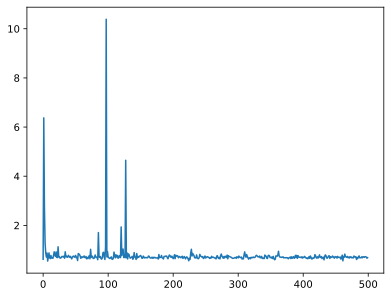

In [5]:
plt.plot(range(len(losses)), losses)

训练集精度: 60.0%


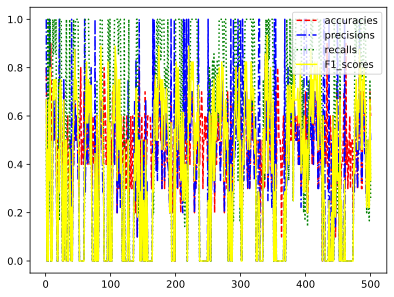

In [6]:
lens = len(accuracies)+1
plt.plot(range(1, lens), accuracies, color='red', linestyle='--', label='accuracies')
plt.plot(range(1, lens), precisions, color='blue', linestyle='-.', label='precisions')
plt.plot(range(1, lens), recalls, color='green', linestyle=':', label='recalls')
plt.plot(range(1, lens), F1_scores, color='yellow', linestyle='-', label='F1_scores')
plt.legend()

print(f'训练集精度: {100*accuracies[len(accuracies)-1]}%')

In [7]:
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs.to(device))
        _, predicted = torch.max(outputs.cpu(), dim=1)
        labels = labels.cpu()
        tp = torch.sum((labels.reshape(-1) == 0) & (predicted == 0)).item()
        tn = torch.sum((labels.reshape(-1) == 1) & (predicted == 1)).item()
        fp = torch.sum((labels.reshape(-1) == 1) & (predicted == 0)).item()
        fn = torch.sum((labels.reshape(-1) == 0) & (predicted == 1)).item()
accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp) if ((tp+fp)!=0) else 0
recall = tp/(tp+fn) if ((tp+fn)!=0) else 0
print(f'测试集准确率: {100*accuracy}%')
print(f'测试集精确率: {100*precision}%')
print(f'测试集召回率: {100*recall}%')
print(f'测试集F1值: {(2*precision*recall/(precision+recall)) if ((precision+recall)!=0) else 0}')


测试集准确率: 80.0%
测试集精确率: 75.0%
测试集召回率: 75.0%
测试集F1值: 0.75
